In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Install and Import requirements**

In [2]:
!pip install category_encoders

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import category_encoders as ce

##**Load Dataset**

In [5]:
df = pd.read_csv('/content/drive/MyDrive/dseb61-data-preparation/train.csv', sep=';')
test = pd.read_csv('/content/drive/MyDrive/dseb61-data-preparation/test.csv', sep=';')
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5,Fiat Avventura Power Up 1.3 Emotion,2015,500000,96500,Diesel,Individual,Manual,First Owner,20.5 kmpl,1248 CC,91.72 bhp,209Nm@ 2000rpm,5.0
6,Hyundai i10 Magna 1.2 iTech SE,2013,325000,70000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.7Nm@ 4000rpm,5.0
7,Hyundai EON D Lite Plus,2017,270000,50000,Petrol,Individual,Manual,First Owner,21.1 kmpl,814 CC,55.2 bhp,74.5Nm@ 4000rpm,5.0
8,Mahindra Verito 1.5 D4 BSIII,2011,174000,100000,Diesel,Individual,Manual,Second Owner,21.0 kmpl,1461 CC,64.1 bhp,160Nm@ 2000rpm,5.0
9,Hyundai i10 Magna 1.2 iTech SE,2012,270000,56000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.7Nm@ 4000rpm,5.0


In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [7]:
df.shape

(6000, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


###Basic statistic on numerical & categorical features

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6000.0,2013.814833,4.026733,1983.0,2011.00,2015.0,2017.0,2020.0
selling_price,6000.0,638776.362500,806663.220371,30000.0,255749.75,450000.0,675000.0,10000000.0
km_driven,6000.0,69972.156167,51889.605237,1000.0,35000.00,60000.0,99000.0,1500000.0
seats,5841.0,5.429550,0.977071,2.0,5.00,5.0,5.0,14.0


In [10]:
df.describe(include='O')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6000,6000,6000,6000,6000,5841,5841,5846,5840
unique,1801,4,3,2,5,371,118,303,413
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,90,3265,5006,5228,3904,155,735,272,384


###Missing values in the dataset

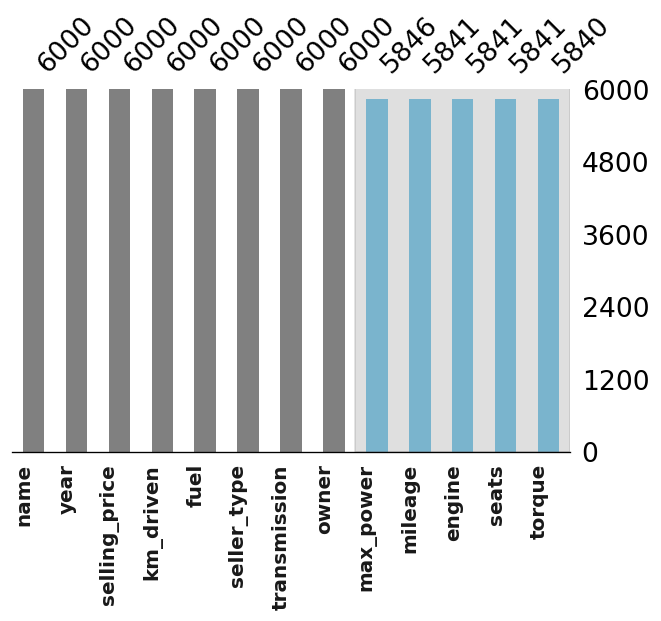

In [11]:
fig, ax = plt.subplots(dpi = 120)

color = ['grey','grey','grey','grey','grey','grey','grey','grey','#79c6e8','#79c6e8','#79c6e8','#79c6e8', '#79c6e8']
msno.bar(df, fontsize =16, color = color, sort = 'descending', ax = ax, figsize = (12,6))
labels = ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'max_power', 'mileage', 'engine',
       'seats', 'torque']
ax.set_xticklabels(labels,{'color':'black','weight':'bold','size':12}, alpha = 0.9,rotation = 90)
ax.axvspan(7.5,12.5,0,7787, color = 'grey', alpha = 0.25)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)
fig.show()

* There are many missing values in 5 columns, we will process these values in the next part.

##**Data Processing**

Credit to **Duc Anh To** for this *torque_processing* function

In [12]:
import re

def torque_processing(torque):
#     fix here if error
    if type(torque) == int and torque == 0:
        return 0,0
#     -----------
    element = torque.split()
    power = []
    for e in element:
        tor = re.findall("(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?", e)
        power.append(tor)
    power = [tor for tor in power if tor]
    if 'kgm@' in torque:
        # 1kgm@ = 10nm
        power[0] = round(float(power[0][0]) * 10, 1)
    else:
        power[0] = round(float(power[0][0]), 1)
    if len(power) == 2:
        if len(power[1]) == 2:
            power[1] = round(np.mean([float(i) for i in power[1]]), 1)
        else:
            power[1] = round(float(power[1][0]), 1)
    if len(power) == 1:
        power.append(None)
    if power[1] < 1000:
    # print('SMALLER THAN 1000',power[1])
        power[1] = round(power[1] * 1000, 1)
    return power[0], power[1]

* Separate all the numbers in the torque field into two small fields *torque_* and *rpm*
* If the unit of *torque_* is Kgm instead of Nm we will multiply the value of torque_ by 10
* Since *rpm* has 2 values, we will take the mean of these 2 values

In [13]:
df['torque'] = df['torque'].str.replace(',','.')
for i in range(df.shape[0]):
  try:
    torque, rpm = torque_processing(df['torque'].iloc[i])
    df.at[i, 'torque_'] = torque
    df.at[i, 'rpm'] = rpm
  except:
    pass
    
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_,rpm
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0,260.0,2125.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0,219.7,2125.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0,360.0,2300.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0,154.9,4200.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,NaN,NaN


In [14]:
test['torque'] = test['torque'].str.replace(',','.')
for i in range(test.shape[0]):
  try:
    torque, rpm = torque_processing(test['torque'].iloc[i])
    test.at[i, 'torque_'] = torque
    test.at[i, 'rpm'] = rpm
  except:
    pass
    
test.head()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_,rpm
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0,153.0,3800.0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0,145.0,4600.0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0,114.0,4000.0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0,290.0,2300.0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,98.96 bhp,215Nm@ 1750-2500rpm,5.0,215.0,2125.0


###Cleaning numerical columns


Create a column *mi* to store *mileage* units for later processing

In [15]:
df['mi'] = df[df.mileage.notnull()].mileage.apply(lambda x: x.split(" ")[1])
test['mi'] = test[test.mileage.notnull()].mileage.apply(lambda x: x.split(" ")[1])


*km_driven*, *mileage*, *engine*, *max_power* have values like "120,000 kms", "21.5 kmpl", "1497 CC", "108.5 bhp", we getting only the numerical values from those strings. eg (km_driven: 120000, mileage: 21.5, engine:1497, max_power: 108.5.3). Addtion, we extracting only the brand name of the car as "Toyota", "BMW", "Volvo", etc. to form a "brand" column.

In [16]:
try:
  df['brand'] = df.name.apply(lambda x: x.split(" ")[0])
  df['mileage'] = df[df.mileage.notnull()].mileage.apply(lambda x: x.split(" ")[0]).astype('float64')
  df['engine'] = df[df.engine.notnull()].engine.apply(lambda x: x.split(" ")[0]).astype('float64')
  df['torque_'] = df[df.torque_.notnull()].torque_.astype('float64')
  df['rpm'] = df[df.rpm.notnull()].rpm.astype('float64')
  df['max_power'] = df[df.max_power.notnull()].max_power.apply(lambda x: x.split(" ")[0])
except:
  pass

In [17]:
try:
  test['brand'] = test.name.apply(lambda x: x.split(" ")[0])
  test['mileage'] = test[test.mileage.notnull()].mileage.apply(lambda x: x.split(" ")[0]).astype('float64')
  test['max_power'] = test[test.max_power.notnull()].max_power.apply(lambda x: x.split(" ")[0])
  test['engine'] = test[test.engine.notnull()].engine.apply(lambda x: x.split(" ")[0]).astype('float64')
  test['torque_'] = test[test.torque_.notnull()].torque_.astype('float64')
  test['rpm'] = test[test.rpm.notnull()].rpm.astype('float64')
  test['max_power'] = test[test.max_power.notnull()].max_power.apply(lambda x: x.split(" ")[0])
except:
  pass

In [18]:
mp = df['max_power'].to_list()
for i in range(len(mp)):
  try:
    mp[i] = float(mp[i])
  except:
    mp[i] = None
df['max_power'] = mp
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
torque_          float64
rpm              float64
mi                object
brand             object
dtype: object

In [19]:
mp = test['max_power'].to_list()
for i in range(len(mp)):
  try:
    mp[i] = float(mp[i])
  except:
    mp[i] = None
test['max_power'] = mp
test.dtypes

Id                int64
name             object
year              int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
mileage         float64
engine          float64
max_power       float64
torque           object
seats           float64
torque_         float64
rpm             float64
mi               object
brand            object
dtype: object

* *mileage* columns has 2 units, if the unit is km/kg, we mutiply the values to 1.4

In [20]:
for i in range(df.shape[0]):
  if df['mi'].iloc[i] == 'km/kg':
    df.at[i, 'mileage'] = df.at[i, 'mileage'] * 1.4

In [21]:
for i in range(test.shape[0]):
  if test['mi'].iloc[i] == 'km/kg':
    test.at[i, 'mileage'] = test.at[i, 'mileage'] * 1.4

###Missing values handling

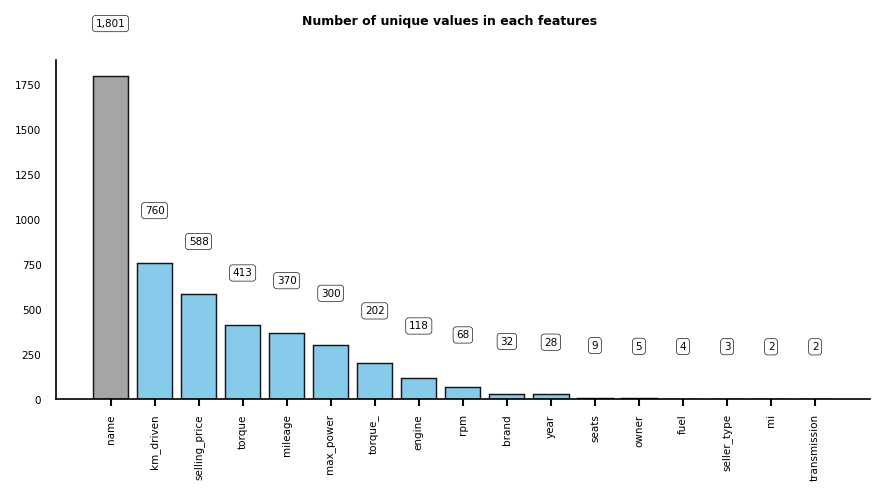

In [22]:
x = df.nunique().sort_values(ascending=False).index
y = df.nunique().sort_values(ascending=False).values

plt.rcParams['figure.dpi'] = 150
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,1)
ax0 = fig.add_subplot(gs[0,0])
for i in ['top', 'right']:
    ax0.spines[i].set_visible(False)
    
colormap = ['#79c6e8' for i in range(df.shape[1])]
colormap[0] = '#9c9a9a'

ax0.bar(x=x, height=y, edgecolor='k', linewidth=0.7, color=colormap, alpha=0.9)
ax0.tick_params(axis='x',labelsize=5, rotation=90, width=1)
ax0.tick_params(axis='y', labelsize=5, left=False)
fig.suptitle(t='Number of unique values in each features', fontsize=6, weight='bold')

for p in ax0.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()+290
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', linewidth=0.3))
plt.show()

Fill in the missing values of the *seats* field with **mode** because this column has a low number of unique values. The remaining fields will be filled with **mean**. Here we will use a new dataframe including both data train and data test to fill missing values to ensure the generality of the data.

In [23]:
data = df.copy() # copying original dataset 
df_concat = pd.concat((df,test),axis=0)

# handling missing values
df['max_power'] = df['max_power'].fillna(df_concat['max_power'].mean())
df['mileage'] = df['mileage'].fillna(df_concat['mileage'].mean())
df['engine'] = df['engine'].fillna(df_concat['engine'].mean())
df['seats'] = df['seats'].fillna(df_concat['seats'].mode()[0])
df['torque_'] = df['torque_'].fillna(df_concat['torque_'].mean())
df['rpm'] = df['rpm'].fillna(df_concat['rpm'].mean())

test['max_power'] = test['max_power'].fillna(df_concat['max_power'].mean())
test['mileage'] = test['mileage'].fillna(df_concat['mileage'].mean())
test['engine'] = test['engine'].fillna(df_concat['engine'].mean())
test['seats'] = test['seats'].fillna(df_concat['seats'].mode()[0])
test['torque_'] = test['torque_'].fillna(df_concat['torque_'].mean())
test['rpm'] = test['rpm'].fillna(df_concat['rpm'].mean())

* Drop the unnecessary

In [24]:
df.drop(["name"],axis=1,inplace=True)
df.drop(["torque"],axis=1,inplace=True)
df.drop(["mi"],axis=1,inplace=True)

In [25]:
test.drop(["name"],axis=1,inplace=True)
test.drop(["torque"],axis=1,inplace=True)
test.drop(["Id"],axis=1,inplace=True)
test.drop(["mi"],axis=1,inplace=True)

##**Data Visualization**

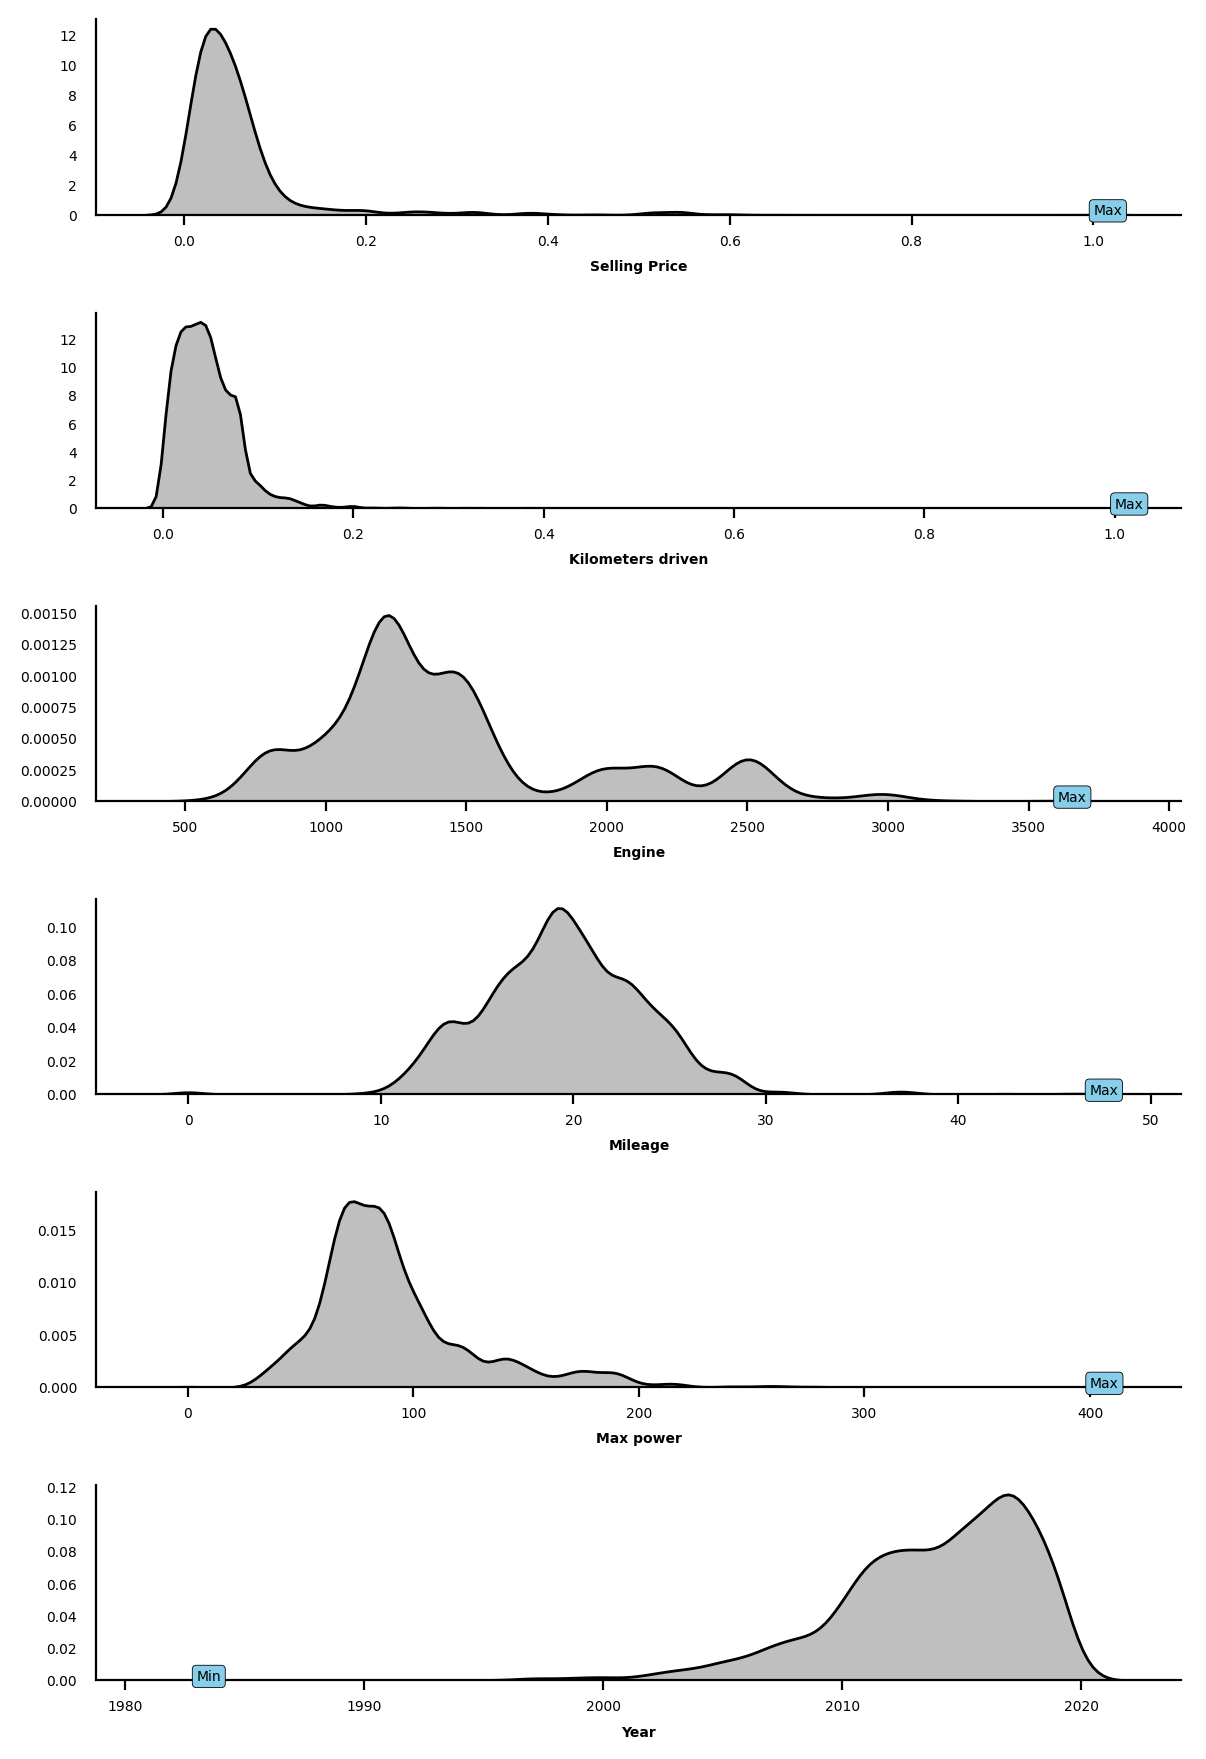

In [26]:
plt.rcParams['figure.dpi'] = 200
fig = plt.figure(figsize=(7,11))
data = df.copy()
# fig.suptitle(t='Distribution of numerical features', fontsize=6, weight='bold')
gs = fig.add_gridspec(6,1)
gs.update(hspace=0.5)

mi=data.selling_price.min()
ma=data.selling_price.max()
price = (data.selling_price-mi)/(ma-mi)

ax0 = fig.add_subplot(gs[0,0])
ax0_sns = sns.kdeplot(x=price, shade=True, color='k')
ax0.text(x=price.max(), y=0, s='Max', fontsize=5, bbox=dict(facecolor='skyblue',linewidth=0.3,boxstyle='round'))
ax0_sns.tick_params(axis='both', labelsize=5, left=False)
ax0_sns.set_xlabel('Selling Price', fontsize=5, weight='bold')
ax0_sns.set_ylabel(None)

mi=data.km_driven.min()
ma=data.km_driven.max()
driven = (data.km_driven-mi)/(ma-mi)
ax1 = fig.add_subplot(gs[1,0])
ax1_sns = sns.kdeplot(x=driven, shade=True, color='k')
ax1.text(x=driven.max(), y=0, s='Max', fontsize=5, bbox=dict(facecolor='skyblue',linewidth=0.3,boxstyle='round'))
ax1_sns.tick_params(axis='both', labelsize=5, left=False)
ax1_sns.set_xlabel('Kilometers driven', fontsize=5, weight='bold')
ax1_sns.set_ylabel(None)

ax2 = fig.add_subplot(gs[2,0])
ax2_sns = sns.kdeplot(data=data,x='engine', shade=True, color='k')
ax2.text(x=data.engine.max(), y=0, s='Max', fontsize=5, bbox=dict(facecolor='skyblue',linewidth=0.3,boxstyle='round'))
ax2_sns.tick_params(axis='both', labelsize=5, left=False)
ax2_sns.set_xlabel('Engine', fontsize=5, weight='bold')
ax2_sns.set_ylabel(None)

ax3 = fig.add_subplot(gs[3,0])
ax3_sns = sns.kdeplot(data=data,x='mileage', shade=True, color='k')
ax3.text(x=data.mileage.max(), y=0, s='Max', fontsize=5, bbox=dict(facecolor='skyblue',linewidth=0.3,boxstyle='round'))
ax3_sns.tick_params(axis='both', labelsize=5, left=False)
ax3_sns.set_xlabel('Mileage', fontsize=5, weight='bold')
ax3_sns.set_ylabel(None)

ax4 = fig.add_subplot(gs[4,0])
ax4_sns = sns.kdeplot(data=data,x='max_power', shade=True, color='k')
ax4.text(x=data.max_power.max(), y=0, s='Max', fontsize=5, bbox=dict(facecolor='skyblue',linewidth=0.3,boxstyle='round'))
ax4_sns.tick_params(axis='both', labelsize=5, left=False)
ax4_sns.set_xlabel('Max power', fontsize=5, weight='bold')
ax4_sns.set_ylabel(None)

ax5 = fig.add_subplot(gs[5,0])
ax5_sns = sns.kdeplot(data=data,x='year', shade=True, color='k')
ax5.text(x=data.year.min(), y=0, s='Min', fontsize=5, bbox=dict(facecolor='skyblue',linewidth=0.3,boxstyle='round'))
ax5_sns.tick_params(axis='both', labelsize=5, left=False)
ax5_sns.set_xlabel('Year', fontsize=5, weight='bold')
ax5_sns.set_ylabel(None)

sns.despine()
plt.show()

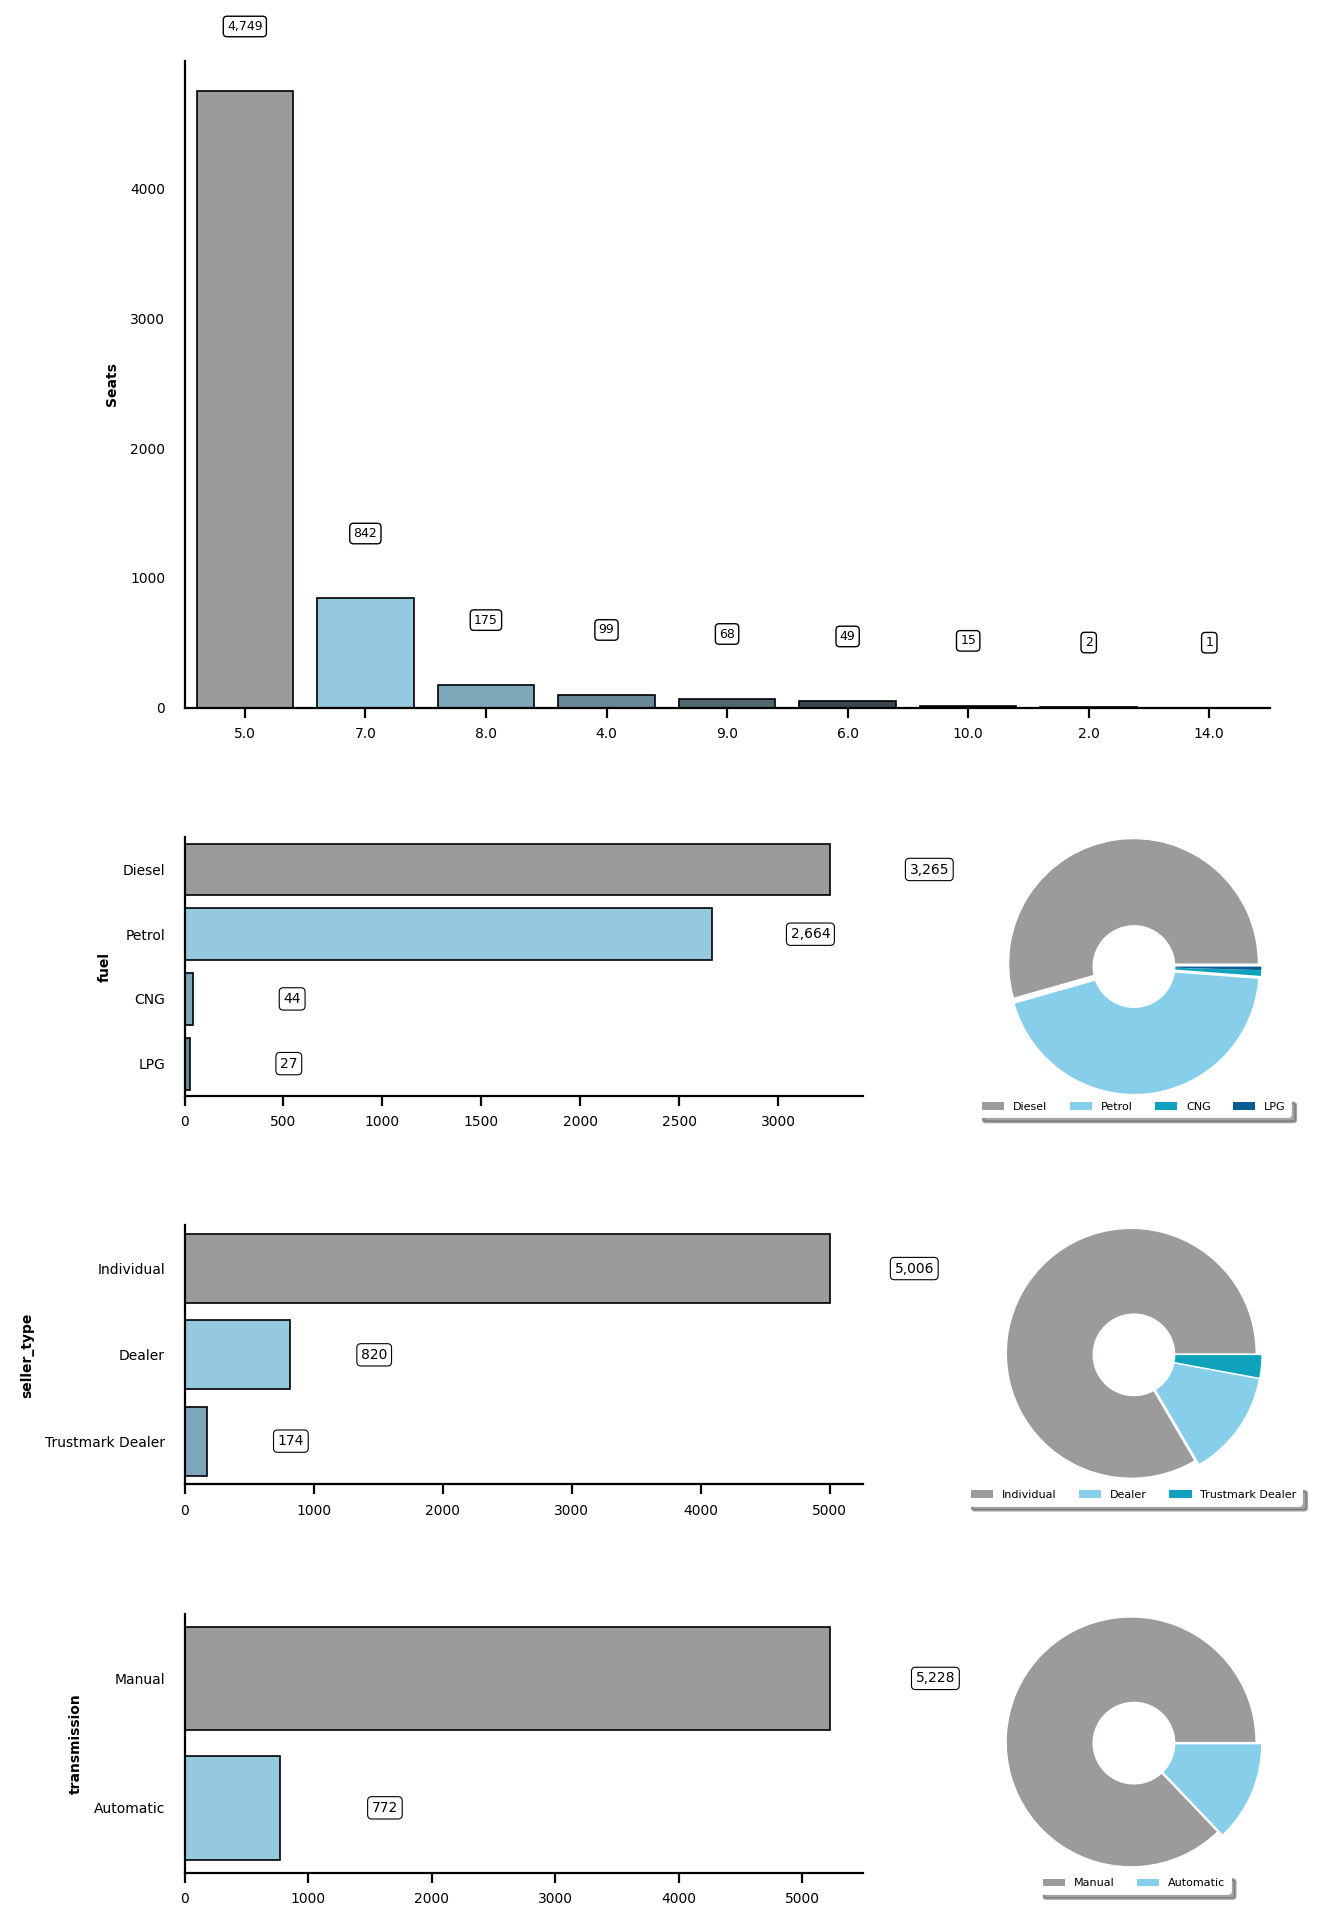

In [27]:
fig = plt.figure(figsize=(7,12))
gs = fig.add_gridspec(5,3)
gs.update(hspace=0.5, wspace=0.5)

pal = sns.dark_palette('skyblue', reverse=True)
pal.insert(0, '#9c9a9a')
# Row 1 ----------------------------------------------------------------------------------------------------------
# Countplot
ax0 = fig.add_subplot(gs[0:2,0:3])
ax0_s = sns.countplot(data=data,
                      x='seats', 
                      palette=pal, 
                      edgecolor='k', 
                      linewidth=0.6, 
                      order=[i for i in data.seats.value_counts().index])
ax0_s.tick_params(labelsize=5, left=False)
ax0_s.set_xlabel(None)
ax0_s.set_ylabel(ylabel='Seats', fontsize=5, weight='bold')

for p in ax0_s.patches:
    value = f"{p.get_height():,.0f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+500
    ax0.text(x, y, value, fontsize=4.5, ha='center', va='center', 
             bbox=dict(facecolor='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
# Row 2 ----------------------------------------------------------------------------------------------------------- 
# Countplot-----------
ax1 = fig.add_subplot(gs[2,0:2])
ax1_s = sns.countplot(data=data, y='fuel', 
                      palette=pal, edgecolor='k', linewidth=0.6, 
                      order=[i for i in data.fuel.value_counts().index])
ax1_s.tick_params(labelsize=5, left=False)
ax1_s.set_xlabel(None)
ax1_s.set_ylabel(ylabel='fuel', fontsize=5, weight='bold')
for p in ax1_s.patches:
    value = f"{p.get_width():,.0f}"
    x = p.get_x() + p.get_width()+500
    y = p.get_y() + p.get_height()/2
    ax1.text(x, y, value, fontsize=5, ha='center', va='center', 
             bbox=dict(facecolor='white', edgecolor='k', boxstyle='round', linewidth=0.4))
# Pie plot------------ 
ax11 = fig.add_subplot(gs[2,2])
ax11.pie(x = data.fuel.value_counts().values,
        colors=['#9c9a9a','skyblue','#0fa2bd','#075c91','#012338'],
        explode = [0.03 for i in range(data.fuel.nunique())],
        radius=1.2,
        textprops=dict(fontsize=5))
ax11.add_artist(plt.Circle((0,0),0.4,fc='white'))
ax11.legend(labels = data.fuel.value_counts().index, 
            ncol=5, fontsize=4,edgecolor='white', shadow=True, loc='lower center',bbox_to_anchor=(0.5,-0.1))

# Row 3 ------------------------------------------------------------------------------------------------------------
# Countplot-----------
ax2 = fig.add_subplot(gs[3,0:2])
ax2_s = sns.countplot(data=data, y='seller_type', 
                      palette=pal, edgecolor='k', linewidth=0.6, 
                      order=[i for i in data.seller_type.value_counts().index])
ax2_s.tick_params(labelsize=5, left=False)
ax2_s.set_xlabel(None)
ax2_s.set_ylabel(ylabel='seller_type', fontsize=5, weight='bold')
for p in ax2_s.patches:
    value = f"{p.get_width():,.0f}"
    x = p.get_x() + p.get_width()+650
    y = p.get_y() + p.get_height()/2
    ax2.text(x, y, value, fontsize=5, ha='center', va='center', 
             bbox=dict(facecolor='white', edgecolor='k', boxstyle='round', linewidth=0.4))
# Pie plot------------  
ax21 = fig.add_subplot(gs[3,2])
ax21.pie(x = data.seller_type.value_counts().values,
        colors=['#9c9a9a','skyblue','#0fa2bd','#075c91','#012338'],
        explode = [0.03 for i in range(data.seller_type.nunique())],
        textprops=dict(fontsize=5),
        radius=1.2)
ax21.add_artist(plt.Circle((0,0),0.4,fc='white'))
ax21.legend(labels = data.seller_type.value_counts().index, 
            ncol=5, fontsize=4,edgecolor='white', shadow=True, loc='lower center',bbox_to_anchor=(0.5,-0.1))

# Row 4 ------------------------------------------------------------------------------------------------------------
# Countplot-----------
ax3 = fig.add_subplot(gs[4,0:2])
ax3_s = sns.countplot(data=data, y='transmission', 
                      palette=pal, edgecolor='k', linewidth=0.6, 
                      order=[i for i in data.transmission.value_counts().index])
ax3_s.tick_params(labelsize=5, left=False)
ax3_s.set_xlabel(None)
ax3_s.set_ylabel(ylabel='transmission', fontsize=5, weight='bold')
for p in ax3_s.patches:
    value = f"{p.get_width():,.0f}"
    x = p.get_x() + p.get_width()+850
    y = p.get_y() + p.get_height()/2
    ax3.text(x, y, value, fontsize=5, ha='center', va='center', 
             bbox=dict(facecolor='white', edgecolor='k', boxstyle='round', linewidth=0.4))
# Pie plot------------  
ax31 = fig.add_subplot(gs[4,2])
ax31.pie(x = data.transmission.value_counts().values,
        colors=['#9c9a9a','skyblue','#0fa2bd','#075c91','#012338'],
        explode = [0.03 for i in range(data.transmission.nunique())],
        textprops=dict(fontsize=5),
        radius=1.2)
ax31.add_artist(plt.Circle((0,0),0.4,fc='white'))
ax31.legend(labels = data.transmission.value_counts().index, 
            ncol=5, edgecolor='white',shadow=True, fontsize=4, loc='lower center',bbox_to_anchor=(0.5,-0.1))

sns.despine()
plt.show()

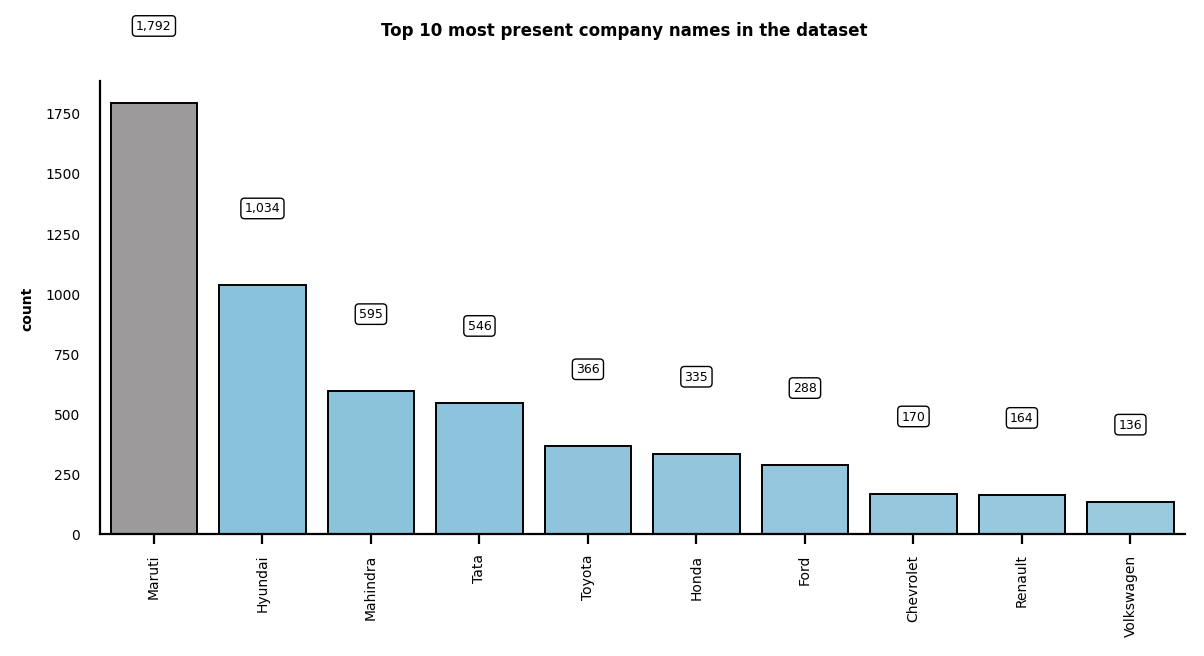

In [28]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,1)

cars = data.brand.value_counts().head(10)
pal = sns.light_palette('#79c6e8', n_colors=50, reverse=True)
pal[0] = '#9c9a9a'
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5, left=False)
ax.set_ylabel(ylabel='count', fontsize=5, weight='bold')

for p in ax.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+320
    ax.text(x=x, y=y, s=value, fontsize=4.5, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
fig.suptitle(t='Top 10 most present company names in the dataset', fontsize='6', weight='bold')
sns.despine()
plt.show()

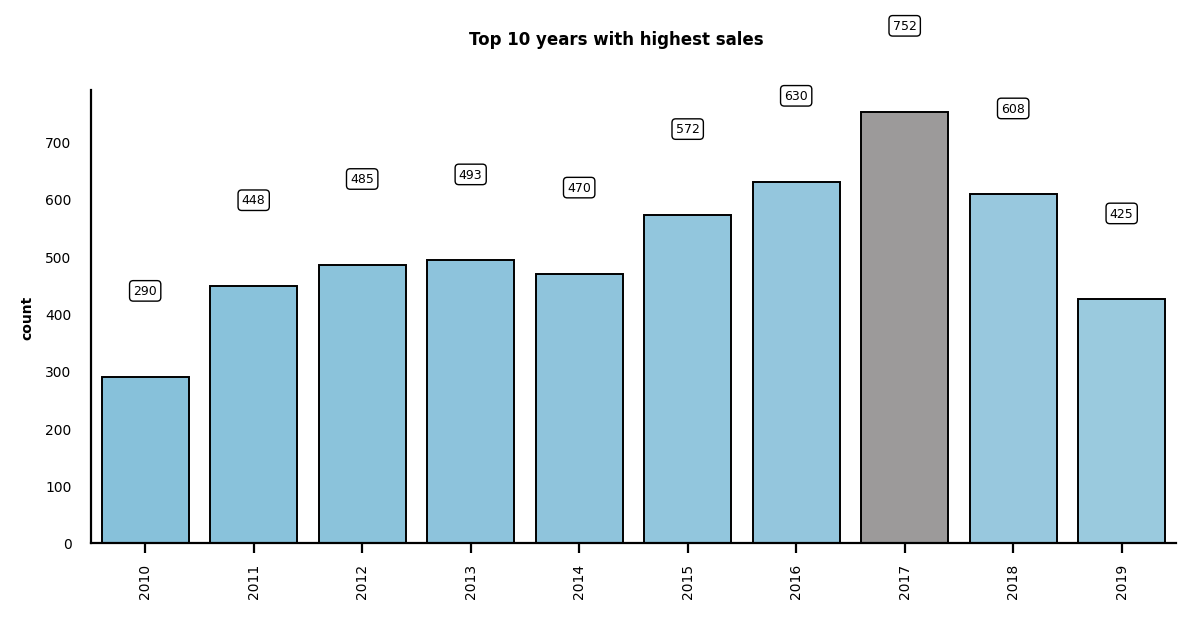

In [29]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,1)

cars = data.year.value_counts().head(10)
pal = sns.light_palette('#79c6e8', n_colors=50, reverse=True)
pal[7] = '#9c9a9a'
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5, left=False)
ax.set_ylabel(ylabel='count', fontsize=5, weight='bold')

for p in ax.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+150
    ax.text(x=x, y=y, s=value, fontsize=4.5, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
fig.suptitle(t='Top 10 years with highest sales', fontsize='6', weight='bold')
sns.despine()
plt.show()

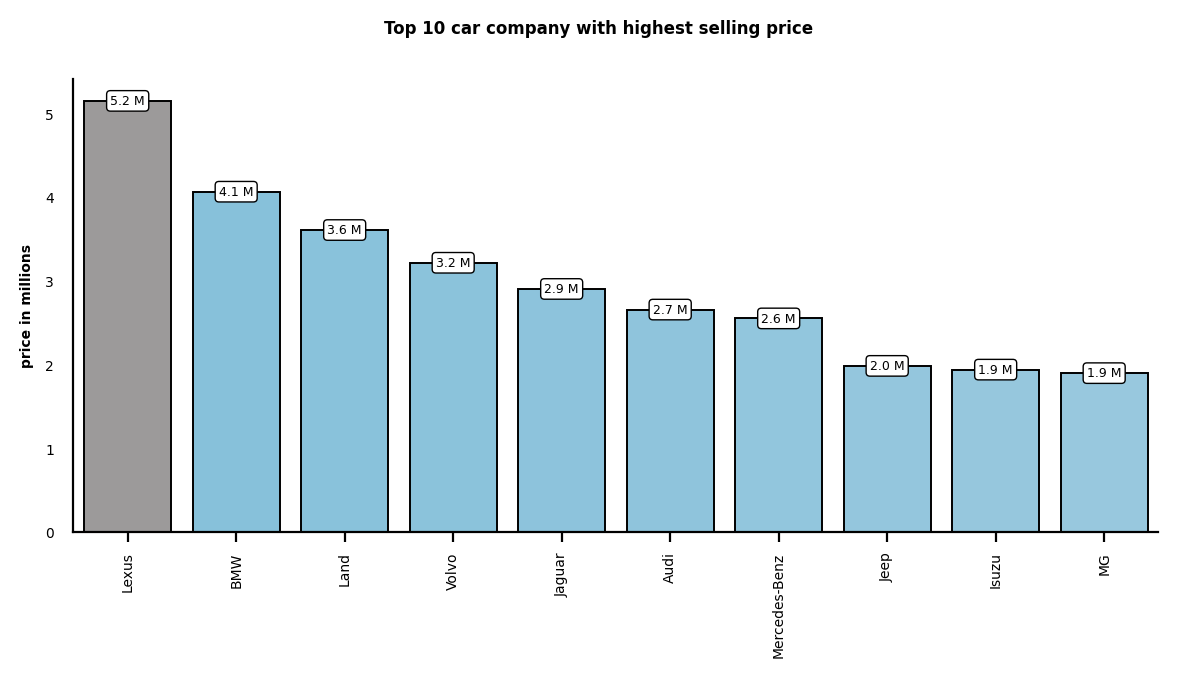

In [30]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,1)

pal = sns.light_palette('#79c6e8', reverse=True, n_colors=50)
pal.insert(0,'#9c9a9a')

cars = data.groupby('brand')['selling_price'].mean().sort_values(ascending=False).head(10)/1000000
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5, left=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel='price in millions', fontsize=5, weight='bold')
for p in ax.patches:
    value = f'{p.get_height():,.1f}' + ' M'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()
    ax.text(x=x, y=y, s=value, fontsize=4.5, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
fig.suptitle(t='Top 10 car company with highest selling price', fontsize=6, weight='bold')
sns.despine()
plt.show()

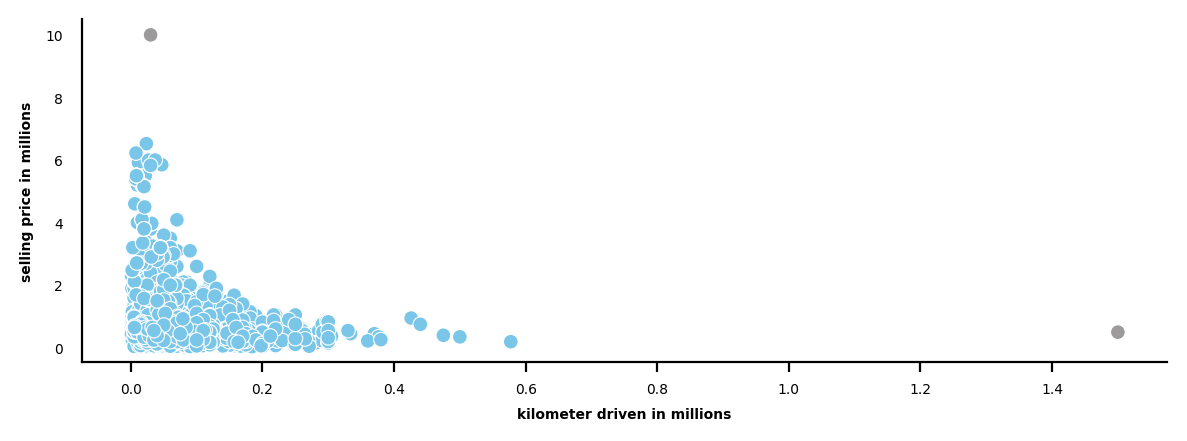

In [31]:
fig = plt.figure(figsize=(7,5))
gs = fig.add_gridspec(2,1)
color = ['#79c6e8' for i in range(data.shape[0])]
color[5537] = color[3001] = '#9c9a9a'
ax=fig.add_subplot(gs[0,0])
ax.scatter(x=data.km_driven/1000000,y=data.selling_price/1000000,s=28,
                       color=color, edgecolor='white', linewidth=0.4)
ax.tick_params(labelsize=5, left=False)
ax.set_ylabel(ylabel='selling price in millions', fontsize=5, weight='bold')
ax.set_xlabel(xlabel='kilometer driven in millions', fontsize=5, weight='bold')
sns.despine()
plt.show()


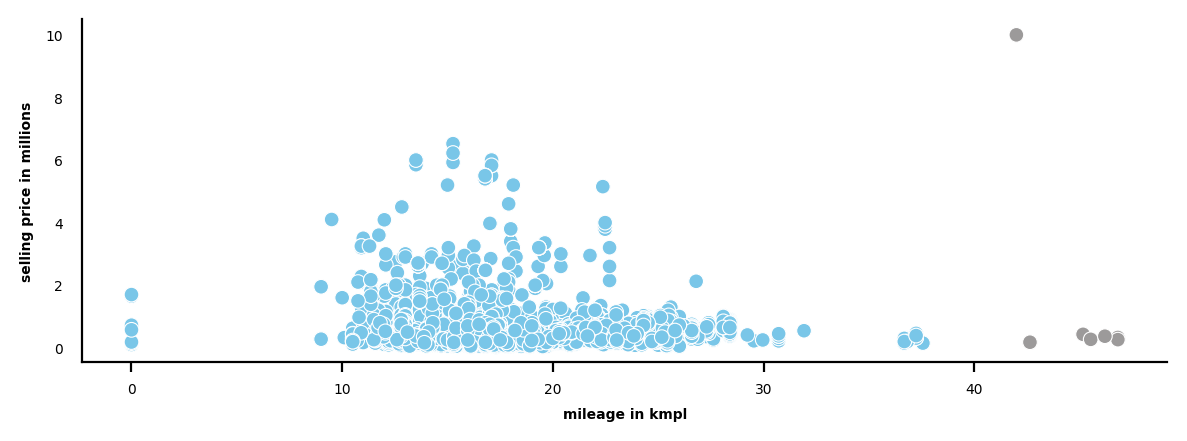

In [32]:
fig = plt.figure(figsize=(7,5))
gs = fig.add_gridspec(2,1)
color = ['#79c6e8' for i in range(data.shape[0])]
color[453] = color[962] = color[1001] = color[1146] = color[1660] = color[2164] = color[5227] = color[5537] = '#9c9a9a'
ax=fig.add_subplot(gs[0,0])
ax.scatter(x=data.mileage,y=data.selling_price/1000000,s=28,
                       color=color, edgecolor='white', linewidth=0.4)
ax.tick_params(labelsize=5, left=False)
ax.set_ylabel(ylabel='selling price in millions', fontsize=5, weight='bold')
ax.set_xlabel(xlabel='mileage in kmpl', fontsize=5, weight='bold')
sns.despine()
plt.show()

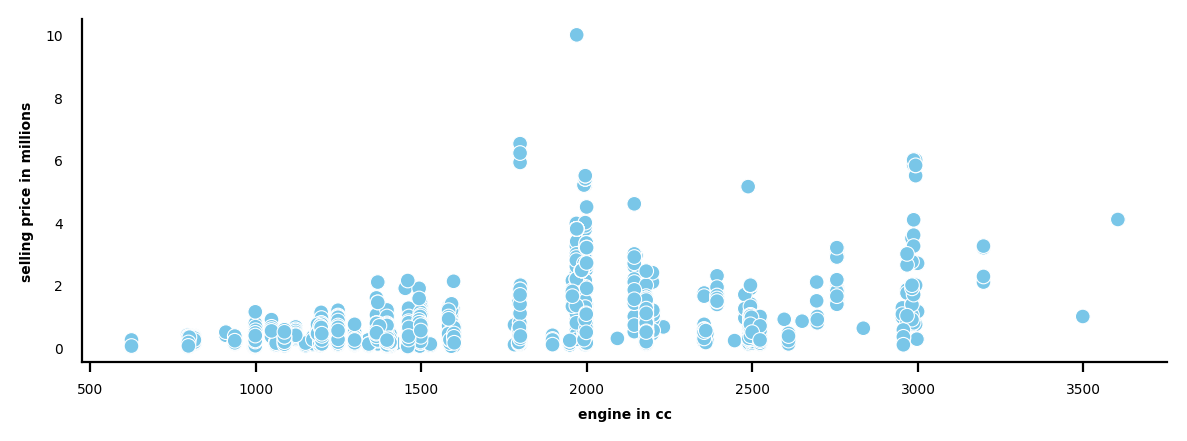

In [33]:
fig = plt.figure(figsize=(7,5))
gs = fig.add_gridspec(2,1)
color = ['#79c6e8' for i in range(data.shape[0])]
ax=fig.add_subplot(gs[0,0])
ax.scatter(x=data.engine,y=data.selling_price/1000000,s=28,
                       color=color, edgecolor='white', linewidth=0.4)
ax.tick_params(labelsize=5, left=False)
ax.set_ylabel(ylabel='selling price in millions', fontsize=5, weight='bold')
ax.set_xlabel(xlabel='engine in cc', fontsize=5, weight='bold')
sns.despine()
plt.show()

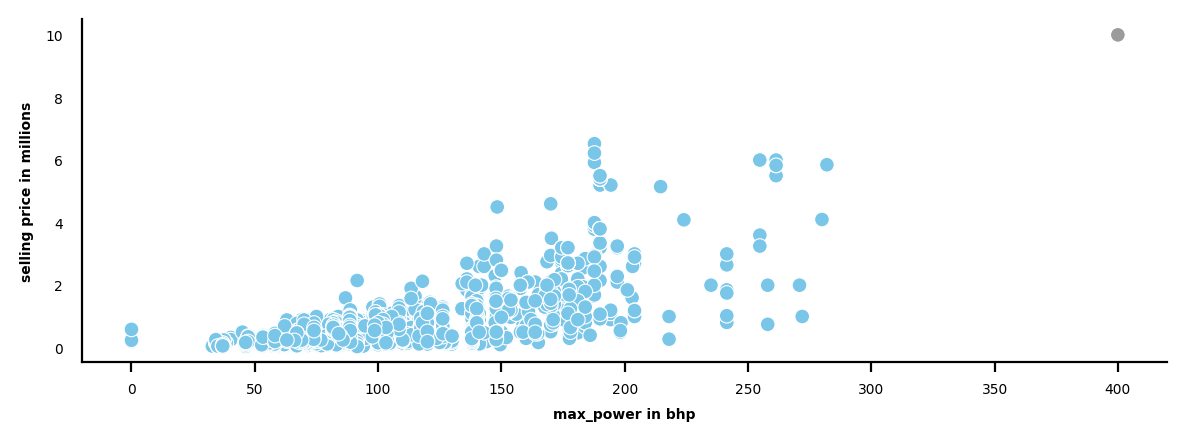

In [34]:
fig = plt.figure(figsize=(7,5))
gs = fig.add_gridspec(2,1)
color = ['#79c6e8' for i in range(data.shape[0])]
color[5537] = '#9c9a9a'
ax=fig.add_subplot(gs[0,0])
ax.scatter(x=data.max_power,y=data.selling_price/1000000,s=28,
                       color=color, edgecolor='white', linewidth=0.4)
ax.tick_params(labelsize=5, left=False)
ax.set_ylabel(ylabel='selling price in millions', fontsize=5, weight='bold')
ax.set_xlabel(xlabel='max_power in bhp', fontsize=5, weight='bold')
sns.despine()
plt.show()

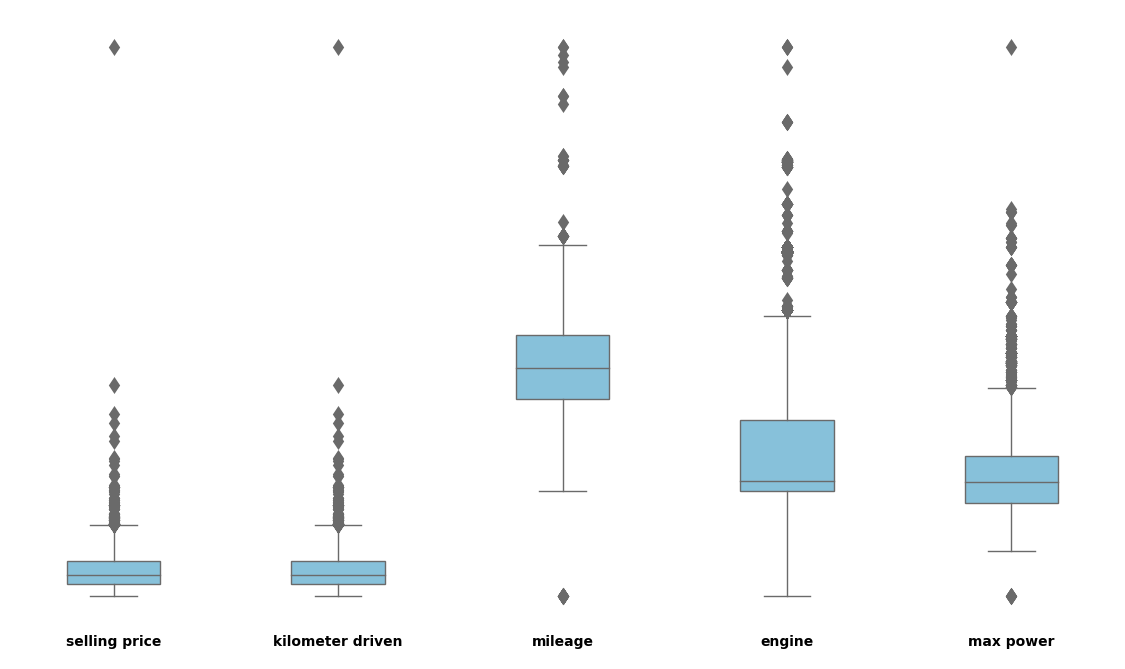

In [35]:
fig = plt.figure(figsize=(7,4))
gs = fig.add_gridspec(1,5)
gs.update(wspace=0.2)
# Selling price---------------------------
ax0=fig.add_subplot(gs[0,0])
ax0_s = sns.boxplot(y=data['km_driven'],width=0.5,color='#79c6e8',linewidth=0.5,fliersize=3)
ax0_s.tick_params(labelsize=5, left=False)
ax0_s.set_xticks([])
ax0_s.set_yticks([])
ax0_s.set_ylabel(None)
ax0_s.set_xlabel('selling price', fontsize=5, weight='bold')
for i in ['top', 'right', 'left', 'bottom']:
    ax0_s.spines[i].set_visible(False)
# Kilometer driven---------------------------
ax1=fig.add_subplot(gs[0,1])
ax1_s = sns.boxplot(y=data['km_driven'],width=0.5,color='#79c6e8',linewidth=0.5,fliersize=3)
ax1_s.tick_params(labelsize=5, left=False)
ax1_s.set_xticks([])
ax1_s.set_yticks([])
ax1_s.set_ylabel(None)
ax1_s.set_xlabel('kilometer driven', fontsize=5, weight='bold')
for i in ['top', 'right', 'left', 'bottom']:
    ax1_s.spines[i].set_visible(False)
# mileage------------------------------------
ax2=fig.add_subplot(gs[0,2])
ax2_s = sns.boxplot(y=data['mileage'],width=0.5,color='#79c6e8',linewidth=0.5,fliersize=3)
ax2_s.tick_params(labelsize=5, left=False)
ax2_s.set_xticks([])
ax2_s.set_yticks([])
ax2_s.set_ylabel(None)
ax2_s.set_xlabel('mileage', fontsize=5, weight='bold')
for i in ['top', 'right', 'left', 'bottom']:
    ax2_s.spines[i].set_visible(False)
# engine--------------------------------------
ax3=fig.add_subplot(gs[0,3])
ax3_s = sns.boxplot(y=data['engine'],width=0.5,color='#79c6e8',linewidth=0.5,fliersize=3)
ax3_s.tick_params(labelsize=5, left=False)
ax3_s.set_xticks([])
ax3_s.set_yticks([])
ax3_s.set_ylabel(None)
ax3_s.set_xlabel('engine', fontsize=5, weight='bold')
for i in ['top', 'right', 'left', 'bottom']:
    ax3.spines[i].set_visible(False)
# max power------------------------------------
ax4=fig.add_subplot(gs[0,4])
ax4_s = sns.boxplot(y=data['max_power'],width=0.5,color='#79c6e8',linewidth=0.5,fliersize=3)
ax4_s.tick_params(labelsize=5, left=False)
ax4_s.set_xticks([])
ax4_s.set_yticks([])
ax4_s.set_ylabel(None)
ax4_s.set_xlabel('max power', fontsize=5, weight='bold')
for i in ['top', 'right', 'left', 'bottom']:
    ax4_s.spines[i].set_visible(False)
    
plt.show()

In [36]:
df[(df.selling_price > 8e6)]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_,rpm,brand
5537,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969.0,400.0,4.0,640.0,1740.0,Volvo


In [37]:
df = df.drop(5537)

* Drop the outlier in *selling_price*

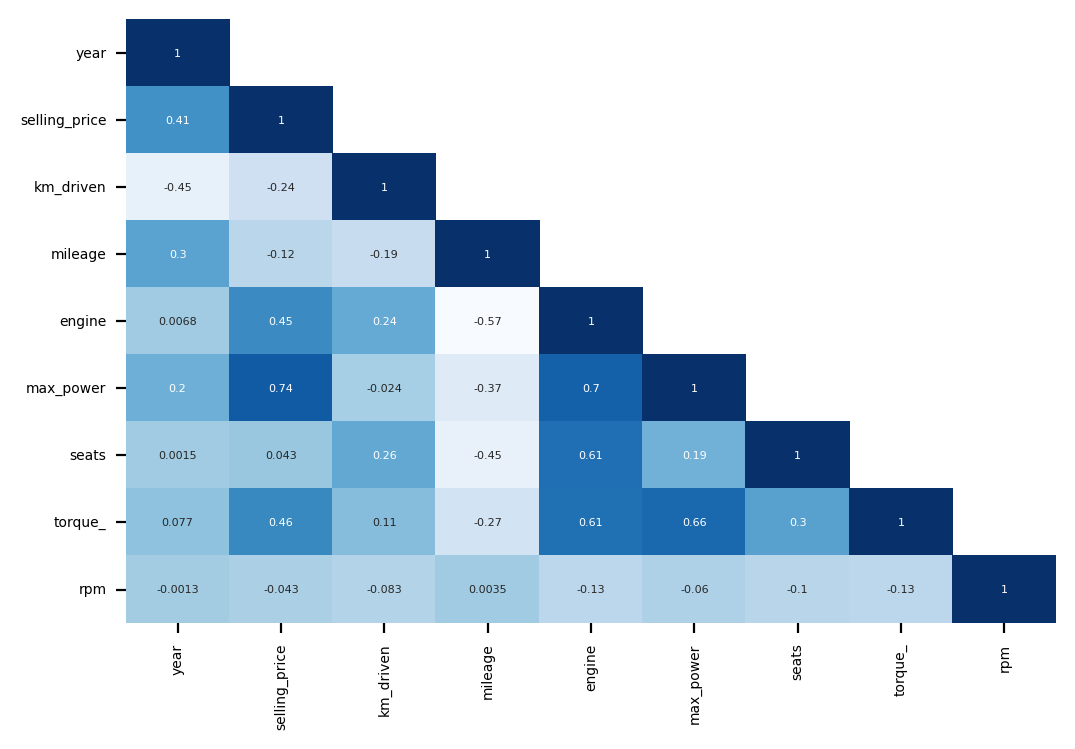

In [38]:
fig = plt.figure(figsize=(6,4))
ax = sns.heatmap(data.corr(), cmap='Blues', mask=np.triu(df.corr(), k=1), cbar=False, annot=True,
                 annot_kws=dict(fontsize=4))
ax.set_facecolor('white')
ax.tick_params(labelsize=5)
plt.show()

##**Categorical Data Processing**

For categorical data, we will have 3 ways to encode:

---



* OneHotEncoder: *seller_type*, *fuel* , *transmission*
* LabelEncoder: *owner*
* TargetEncoder: *brand*

Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order. Particularly for brands, we use TargetEncoder which is replacing a categorical value with the mean of the target variable (*selling_price*).



In [39]:
df = pd.get_dummies(data=df, columns=['seller_type','fuel','transmission'], drop_first=True)
df.head(10)

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,torque_,rpm,brand,seller_type_Individual,seller_type_Trustmark Dealer,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual
0,2018,850000,9500,First Owner,21.50,1497.0,108.50,5.0,260.000000,2125.000000,Tata,1,0,1,0,0,1
1,2018,750000,30000,First Owner,21.19,1396.0,88.76,5.0,219.700000,2125.000000,Hyundai,1,0,1,0,0,1
2,2015,1500000,80000,Second Owner,12.55,2982.0,168.50,7.0,360.000000,2300.000000,Toyota,1,0,1,0,0,0
3,2015,795000,35000,First Owner,17.01,1591.0,121.30,5.0,154.900000,4200.000000,Hyundai,1,0,0,0,1,1
4,2019,3800000,20000,First Owner,18.00,1969.0,190.00,5.0,178.133841,2950.226562,Volvo,1,0,1,0,0,0
5,2015,500000,96500,First Owner,20.50,1248.0,91.72,5.0,209.000000,2000.000000,Fiat,1,0,1,0,0,1
6,2013,325000,70000,First Owner,20.36,1197.0,78.90,5.0,111.700000,4000.000000,Hyundai,1,0,0,0,1,1
7,2017,270000,50000,First Owner,21.10,814.0,55.20,5.0,74.500000,4000.000000,Hyundai,1,0,0,0,1,1
8,2011,174000,100000,Second Owner,21.00,1461.0,64.10,5.0,160.000000,2000.000000,Mahindra,1,0,1,0,0,1
9,2012,270000,56000,First Owner,20.36,1197.0,78.90,5.0,111.700000,4000.000000,Hyundai,1,0,0,0,1,1


In [40]:
test = pd.get_dummies(data=test, columns=['seller_type','fuel','transmission'], drop_first=True)
test.head(10)

,year,km_driven,owner,mileage,engine,max_power,seats,torque_,rpm,brand,seller_type_Individual,seller_type_Trustmark Dealer,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual
0,2016,11000,First Owner,14.30,1598.0,103.50,5.0,153.0,3800.0,Skoda,0,0,0,0,1,0
1,2017,35000,First Owner,17.80,1497.0,117.30,5.0,145.0,4600.0,Honda,1,0,0,0,1,1
2,2014,80000,First Owner,19.10,1197.0,82.00,5.0,114.0,4000.0,Hyundai,1,0,0,0,1,1
3,2014,145241,First Owner,12.05,2179.0,120.00,7.0,290.0,2300.0,Mahindra,1,0,1,0,0,1
4,2015,92651,First Owner,21.70,1498.0,98.96,5.0,215.0,2125.0,Ford,0,0,1,0,0,1
5,2008,120000,Second Owner,19.70,796.0,35.00,8.0,61.0,3000.0,Maruti,1,0,0,0,1,1
6,2007,70000,Third Owner,18.90,1061.0,67.00,5.0,84.0,3500.0,Maruti,1,0,0,0,1,1
7,2011,70000,First Owner,16.36,1495.0,93.70,5.0,124.6,3500.0,Hyundai,1,0,0,0,1,1
8,2013,56000,First Owner,22.10,1248.0,74.00,5.0,190.0,1750.0,Chevrolet,0,0,1,0,0,1
9,2019,3500,First Owner,18.60,1197.0,81.86,5.0,117.0,4000.0,Hyundai,1,0,0,0,1,1


In [41]:
TargetE = ce.TargetEncoder()
df['brand'] = TargetE.fit_transform(df['brand'], df['selling_price'],verbose=3)
test['brand'] = TargetE.transform(test['brand'])

In [42]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

data = df.copy()
cols = np.array(df.columns[df.dtypes != object])
d = defaultdict(LabelEncoder)
df = df.apply(lambda x: d[x.name].fit_transform(x))
df[cols] = data[cols]
df.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,torque_,rpm,brand,seller_type_Individual,seller_type_Trustmark Dealer,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual
0,2018,850000,9500,0,21.50,1497.0,108.50,5.0,260.000000,2125.000000,3.689275e+05,1,0,1,0,0,1
1,2018,750000,30000,0,21.19,1396.0,88.76,5.0,219.700000,2125.000000,4.542093e+05,1,0,1,0,0,1
2,2015,1500000,80000,2,12.55,2982.0,168.50,7.0,360.000000,2300.000000,9.519480e+05,1,0,1,0,0,0
3,2015,795000,35000,0,17.01,1591.0,121.30,5.0,154.900000,4200.000000,4.542093e+05,1,0,0,0,1,1
4,2019,3800000,20000,0,18.00,1969.0,190.00,5.0,178.133841,2950.226562,3.079082e+06,1,0,1,0,0,0


In [43]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

data1 = test.copy()
cols = np.array(test.columns[test.dtypes != object])
d = defaultdict(LabelEncoder)
test = test.apply(lambda x: d[x.name].fit_transform(x))
test[cols] = data1[cols]
test.head()

,year,km_driven,owner,mileage,engine,max_power,seats,torque_,rpm,brand,seller_type_Individual,seller_type_Trustmark Dealer,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual
0,2016,11000,0,14.30,1598.0,103.50,5.0,153.0,3800.0,635844.116883,0,0,0,0,1,0
1,2017,35000,0,17.80,1497.0,117.30,5.0,145.0,4600.0,595635.791045,1,0,0,0,1,1
2,2014,80000,0,19.10,1197.0,82.00,5.0,114.0,4000.0,454209.346228,1,0,0,0,1,1
3,2014,145241,0,12.05,2179.0,120.00,7.0,290.0,2300.0,617766.346218,1,0,1,0,0,1
4,2015,92651,0,21.70,1498.0,98.96,5.0,215.0,2125.0,521274.267361,0,0,1,0,0,1


##**Modeling**

In [44]:
y = df.selling_price
X = df.drop(columns=['selling_price'])

###Spliting the data for the model

In [45]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In this work, i'm using the **Light GBM Regressor** as the main regression model for the competition

In [46]:
from lightgbm import LGBMRegressor

In [47]:
base_lgbmr = LGBMRegressor()

In [48]:
base_lgbmr.fit(X_train, y_train)
base_lgbmr.score(X_test,y_test)

0.9831133248967285

In [49]:
yhat_lgbmr = base_lgbmr.predict(X_test)
np.sqrt(mean_squared_error(y_test, yhat_lgbmr))

107413.29216197251

In [50]:
base_lgbmr.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [51]:
from sklearn.model_selection import RandomizedSearchCV

param_grid2 = {
    "learning_rate": [0.25,0.2],
    "max_depth": [9,7,11],
    "n_estimators": [i for i in range(300, 360, 10)],
    "num_leaves": [22, 24, 26],
    'reg_alpha': [0.5],
    'reg_lambda': [0.02],
    'min_data_in_leaf': [23]
}

for _ in range(10):
  gscv_lgbm2 = RandomizedSearchCV(base_lgbmr, param_grid2, n_jobs=-1, verbose=0, cv=4)
  gscv_lgbm2.fit(X_train, y_train)
  yhat_lgbmr = gscv_lgbm2.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, yhat_lgbmr))
  if rmse < 103000.0:
    print(gscv_lgbm2.best_params_)
    print(rmse)
    print('----------------')

In [52]:
par1 = {'learning_rate': [0.25], 'n_estimators': [320], 'num_leaves': [24], 'reg_alpha': [0.5], 'reg_lambda': [0.02],'min_data_in_leaf': [23], "metric" : ["rmse"], 'max_depth': [9]}

feature1 = ['year', 'km_driven', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'torque_', 'rpm', 'brand', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'transmission_Manual']

X0 = test[feature1].values
X1 = df.drop(['selling_price'], axis=1).values
y1 = df.selling_price.values
model = GridSearchCV(estimator=base_lgbmr, param_grid=par1, n_jobs=-1, verbose=5, cv=4)
model.fit(X1, y1)
pred = model.predict(X0)
submission = pd.DataFrame({'Id':test.index,'Predicted':pred}) 
submission.Id = submission.Id.apply(lambda x: x+1)
submission.head(10)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


,Id,Predicted
0,1,647699.703113
1,2,725209.817517
2,3,403579.643775
3,4,626290.806370
4,5,670601.323930
5,6,98027.787590
6,7,118057.743793
7,8,235577.618629
8,9,224227.010825
9,10,644049.399371


In [53]:
# filename = 'submission 1219.csv'

# submission.to_csv(filename,index=False)

# print('Saved file: ' + filename)